# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [4]:
import pandas as pd
from pandas import get_dummies
!pip install palmerpenguins
from palmerpenguins import load_penguins
import sklearn
from sklearn import *
df = load_penguins()
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [8]:
#dummify species, island, sex, and year
clean_data = df.dropna()
dummified_data = pd.get_dummies(clean_data, columns=['species', 'island', 'sex', 'year'], drop_first=True)
df = dummified_data
df.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male,year_2008,year_2009
0,39.1,18.7,181.0,3750.0,0,0,0,1,1,0,0
1,39.5,17.4,186.0,3800.0,0,0,0,1,0,0,0
2,40.3,18.0,195.0,3250.0,0,0,0,1,0,0,0
4,36.7,19.3,193.0,3450.0,0,0,0,1,0,0,0
5,39.3,20.6,190.0,3650.0,0,0,0,1,1,0,0


Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [ ]:
#split data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

#Model 1
y1 = df['bill_depth_mm']
X1 = df[['bill_length_mm']]

#split data into training and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size=0.25)

#model creation
lr = LinearRegression()
m1_fit = lr.fit(X_train,y_train)
#predict
pred_m1 = m1_fit.predict(X_test)

m1_R2 = r2_score(y_test, pred_m1)
m1_R2

0.07296204857251376

In [35]:


#Model 2
y2 = df['bill_depth_mm']
X2 = df[['bill_length_mm', 'body_mass_g', 'sex_male']]

#split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size=0.25)

#model creation
lr = LinearRegression()
m2_fit = lr.fit(X_train,y_train)
#predict
pred_m2 = m2_fit.predict(X_test)

m2_R2 = r2_score(y_test, pred_m2)
m2_R2



0.647709563952685

In [36]:

#Model 3
y3 = df['bill_depth_mm']
X3 = df[['bill_length_mm', 'body_mass_g', 'sex_male', 'flipper_length_mm', 'species_Chinstrap', 'species_Gentoo']]

#split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size=0.25)

#model creation
lr = LinearRegression()
m3_fit = lr.fit(X_train,y_train)
#predict
pred_m3 = m3_fit.predict(X_test)

m3_R2 = r2_score(y_test, pred_m3)
m3_R2

0.8057937320501218

In [37]:

#Model 4
y4 = df['bill_depth_mm']
X4 = df[['bill_length_mm', 'body_mass_g', 'sex_male', 'flipper_length_mm', 'species_Chinstrap', 'species_Gentoo', 'island_Dream', 'island_Torgersen', 'year_2008', 'year_2009']]

#split data into training and test
X_train, X_test, y_train, y_test = train_test_split(X4, y4, test_size=0.25)

#model creation
lr = LinearRegression()
m4_fit = lr.fit(X_train,y_train)
#predict
pred_m4 = m4_fit.predict(X_test)

m4_R2 = r2_score(y_test, pred_m4)
m4_R2

0.7726788576877233

In [41]:
#create a dataframe for R^2 values and number of predictor variables
Models_data = pd.DataFrame({
    "Values": [0.07296204857251376, 0.647709563952685, 0.8057937320501218, 0.7726788576877233],
    "Predictors": [1,3,6,10]

})
Models_data

,Values,Predictors
0,0.072962,1
1,0.647710,3
2,0.805794,6
3,0.772679,10


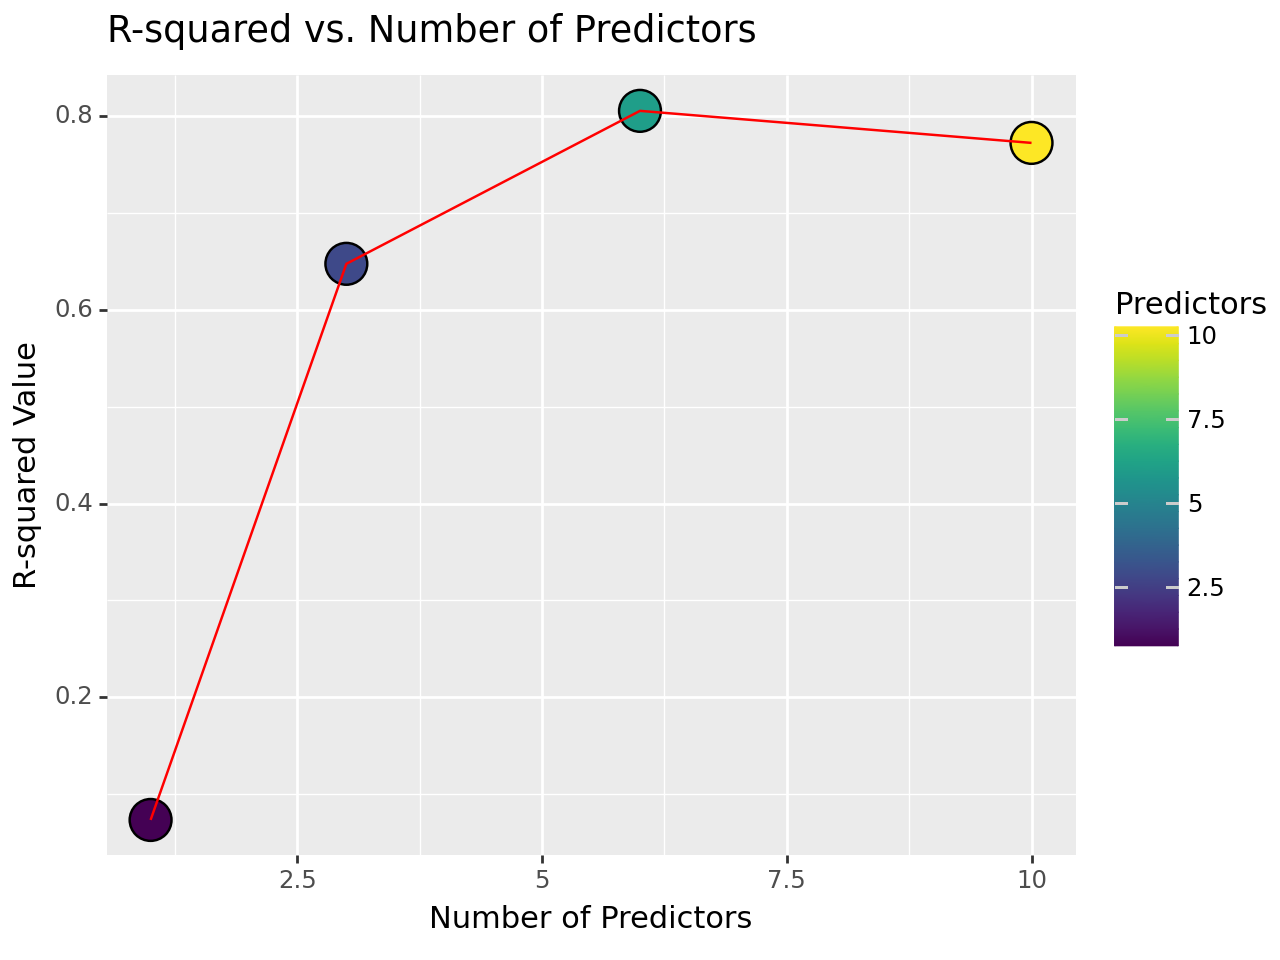

<Figure Size: (640 x 480)>

In [51]:
from re import X
import plotnine as p9
from plotnine import*

plot = (ggplot(
    Models_data, aes(x='Predictors', y='Values', fill= 'Predictors'))+
        geom_point(size=8)+
        geom_line(aes(group=1), color = 'red')+
        xlab('Number of Predictors')+
        ylab('R-squared Value')+
        ggtitle('R-squared vs. Number of Predictors')
)

plot

The best model is Model 3 which has 6 predictor variables. Model 4 which has 10 predictor variables seems to overfit the model and Models 1 & 2 seem to underfit the model.